In [1]:
#set seeds for reproducibility
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models

In [3]:
!pip install kaggle

In [6]:
kaggle_credentails = json.load(open("/content/sample_data/kaggle.json"))

In [7]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails['username']
os.environ['KAGGLE_KEY'] = kaggle_credentails['key']

In [9]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.01G/2.04G [00:26<00:00, 180MB/s]
100% 2.04G/2.04G [00:26<00:00, 81.4MB/s]


In [10]:
!ls

plantvillage-dataset.zip  sample_data


In [11]:
#unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip' , 'r') as zip_ref:
  zip_ref.extractall()

In [13]:
print(os.listdir("plantvillage dataset"))

['color', 'grayscale', 'segmented']


In [16]:
print(len(os.listdir(("/content/plantvillage dataset/segmented"))))
print(os.listdir("/content/plantvillage dataset/segmented"))

38
['Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Blueberry___healthy', 'Tomato___Late_blight', 'Peach___healthy', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Early_blight', 'Raspberry___healthy', 'Potato___healthy', 'Soybean___healthy', 'Tomato___Early_blight', 'Corn_(maize)___healthy', 'Grape___healthy', 'Pepper,_bell___healthy', 'Potato___Late_blight', 'Apple___Black_rot', 'Grape___Esca_(Black_Measles)', 'Cherry_(including_sour)___healthy', 'Tomato___Leaf_Mold', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___healthy', 'Corn_(maize)___Common_rust_', 'Apple___Cedar_apple_rust', 'Grape___Black_rot', 'Squash___Powdery_mildew', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Septoria_leaf_spot', 'Strawberry___healthy', 'Apple___Apple_scab', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___healthy', '

In [17]:
print(len(os.listdir(("/content/plantvillage dataset/color"))))
print(os.listdir("/content/plantvillage dataset/color"))

38
['Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Blueberry___healthy', 'Tomato___Late_blight', 'Peach___healthy', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Early_blight', 'Raspberry___healthy', 'Potato___healthy', 'Soybean___healthy', 'Tomato___Early_blight', 'Corn_(maize)___healthy', 'Grape___healthy', 'Pepper,_bell___healthy', 'Potato___Late_blight', 'Apple___Black_rot', 'Grape___Esca_(Black_Measles)', 'Cherry_(including_sour)___healthy', 'Tomato___Leaf_Mold', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___healthy', 'Corn_(maize)___Common_rust_', 'Apple___Cedar_apple_rust', 'Grape___Black_rot', 'Squash___Powdery_mildew', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Septoria_leaf_spot', 'Strawberry___healthy', 'Apple___Apple_scab', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___healthy', '

In [18]:
print(len(os.listdir(("/content/plantvillage dataset/grayscale")))) # number of classes is 38 in the grayscale folder
print(os.listdir("/content/plantvillage dataset/grayscale"))

38
['Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Blueberry___healthy', 'Tomato___Late_blight', 'Peach___healthy', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Early_blight', 'Raspberry___healthy', 'Potato___healthy', 'Soybean___healthy', 'Tomato___Early_blight', 'Corn_(maize)___healthy', 'Grape___healthy', 'Pepper,_bell___healthy', 'Potato___Late_blight', 'Apple___Black_rot', 'Grape___Esca_(Black_Measles)', 'Cherry_(including_sour)___healthy', 'Tomato___Leaf_Mold', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___healthy', 'Corn_(maize)___Common_rust_', 'Apple___Cedar_apple_rust', 'Grape___Black_rot', 'Squash___Powdery_mildew', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Septoria_leaf_spot', 'Strawberry___healthy', 'Apple___Apple_scab', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___healthy', '

In [20]:
print(len(os.listdir(("/content/plantvillage dataset/color/Apple___Apple_scab"))))
print(os.listdir("/content/plantvillage dataset/color/Apple___Apple_scab"))

630
['9f815013-3c21-403b-80ca-c69cd82d6251___FREC_Scab 2963.JPG', '536ce9e9-6c98-42c6-9447-f38073b3e9da___FREC_Scab 3222.JPG', 'a038a218-4c69-4f5a-9887-80fac9888782___FREC_Scab 3008.JPG', '4b7c40cd-b145-4945-b649-3576a1d898dc___FREC_Scab 3343.JPG', 'a0fb83fc-d5a2-4ddf-9a04-c2bf96e5027f___FREC_Scab 3175.JPG', '5d398d0d-256d-4de5-8dcd-f3b455da2b76___FREC_Scab 3522.JPG', '470bece4-7eb2-4ec1-917a-278559afe463___FREC_Scab 3250.JPG', 'adfdba4a-a725-4c5b-8b1c-96e8b20baa7b___FREC_Scab 3265.JPG', '74f429dd-0b33-41e1-a689-17f8b62dd614___FREC_Scab 3186.JPG', 'f887b059-f797-442d-b2b6-a9cab0f76f43___FREC_Scab 3169.JPG', '48e62e54-d02a-41bb-8486-234408706e69___FREC_Scab 3190.JPG', '1d9d67e2-5603-4710-ae2b-6cb0b922ae61___FREC_Scab 3122.JPG', '563a51b6-2342-4922-b76d-0a6bb69a11f9___FREC_Scab 3107.JPG', 'cd7bc55c-1c47-4af7-9875-f29147d54115___FREC_Scab 3471.JPG', '154842bb-6ee3-4176-9007-cf7a43cfe140___FREC_Scab 3434.JPG', '08c42d78-aa7b-4106-b0c1-b260f898dcba___FREC_Scab 3151.JPG', '6e17c808-c071-4eae

Data Preprocessing


In [21]:
#dataset path
base_dir = "/content/plantvillage dataset/color"

[[[154 138 141]
  [156 140 143]
  [152 136 139]
  ...
  [173 158 161]
  [165 150 153]
  [167 152 155]]

 [[152 136 139]
  [158 142 145]
  [157 141 144]
  ...
  [155 140 143]
  [155 140 143]
  [167 152 155]]

 [[147 131 134]
  [159 143 146]
  [159 143 146]
  ...
  [148 133 136]
  [150 135 138]
  [164 149 152]]

 ...

 [[ 83  71  73]
  [159 147 149]
  [185 173 175]
  ...
  [153 140 147]
  [173 160 167]
  [171 158 165]]

 [[164 152 152]
  [186 174 174]
  [174 162 162]
  ...
  [159 146 153]
  [157 144 151]
  [155 142 149]]

 [[148 137 135]
  [154 143 141]
  [143 131 131]
  ...
  [193 180 187]
  [178 165 172]
  [164 151 158]]]
(256, 256, 3)


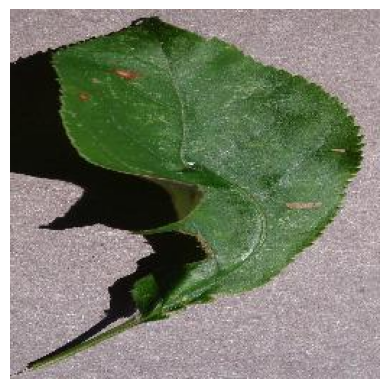

In [24]:
image_path = "/content/plantvillage dataset/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG"
#read the image
img = mpimg.imread(image_path)
print(img)
print(img.shape)
#display the image
plt.imshow(img)
plt.axis('off') # turn off the axis number
plt.show()

In [25]:
# image parameter
image_size = 224
batch_size = 32

train test split

In [27]:
# image data generator
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2 # use 20 % of data for validation
)

In [28]:
# train generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (image_size , image_size), # resizing the image size
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [34]:
# validation generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (image_size , image_size), # resizing the image size
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


In [35]:
train_generator.num_classes

38

Convolutional Neural Network

In [38]:
#model definition
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (image_size , image_size , 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256 , activation = 'relu'))
model.add(layers.Dense(train_generator.num_classes, activation = 'softmax'))

In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#compile the model
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


In [42]:
#training the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size, # no of steps per epochs
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size # validation steps
)

Epoch 1/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 38s 111ms/step - accuracy: 0.9795 - loss: 0.0711 - val_accuracy: 0.9922 - val_loss: 0.0277
Epoch 2/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 1.0000 - loss: 0.0498 - val_accuracy: 0.9936 - val_loss: 0.0249
Epoch 3/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 63s 97ms/step - accuracy: 0.9839 - loss: 0.0587 - val_accuracy: 0.9857 - val_loss: 0.0456
Epoch 4/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 0.9864 - val_loss: 0.0450
Epoch 5/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 68s 101ms/step - accuracy: 0.9934 - loss: 0.0276 - val_accuracy: 0.9870 - val_loss: 0.0509
Epoch 6/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9688 - loss: 0.0383 - val_accuracy: 0.9879 - val_loss: 0.0490
Epoch 7/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.9852 - loss: 0.0511 - val_accuracy: 0.9929 - val_loss: 0.0230
Epoch 8/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9688 - loss: 0.0899 

In [43]:
 #model evalution
print("Evaluating model...")
val_loss , val_accuracy = model.evaluate(validation_generator , steps = validation_generator.samples // batch_size)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9902 - loss: 0.0313
Validation Loss: 0.03211100026965141
Validation Accuracy: 0.9895833134651184


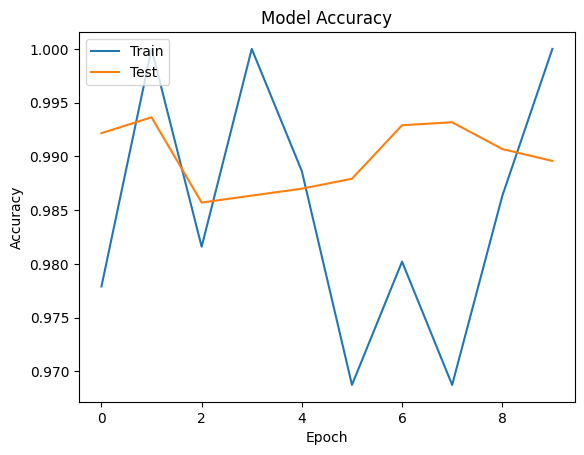

In [44]:
#plot trainig and validation accuracy values
plt.plot(history.history['accuracy'] , label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'] , label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train' , 'Test'] , loc = 'upper left')
plt.show()


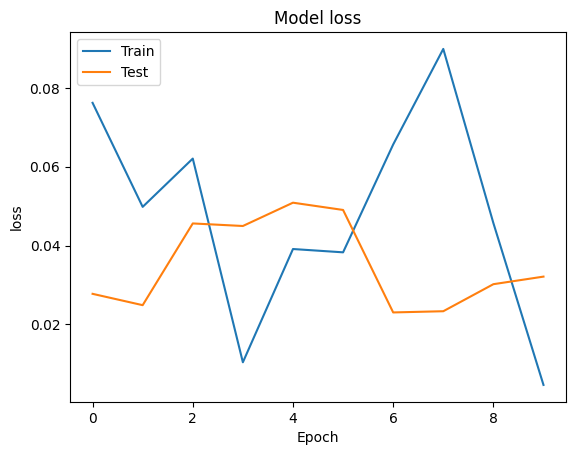

In [45]:
# plot training and validation loss
plt.plot(history.history['loss'] , label = 'Training loss')
plt.plot(history.history['val_loss'] , label = 'Validation loss')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train' , 'Test'] , loc = 'upper left')
plt.show()

In [52]:
def load_and_preprocess_image(image_path , target_size=(224 , 224)):
  #load the image
  img = Image.open(image_path)
  #resize the image
  img = img.resize(target_size)
  #convert the image to numpy array
  img_array = np.array(img)
  # Add batch dimension
  img_array = np.expand_dims(img_array , axis = 0)
  #scaling the image values to [0 ,1]
  img_array = img_array.astype('float32')/255.
  return img_array
#function to predict the class of the image
def predict_image_class(model , image_path , class_indices):
  preprocessed_image = load_and_preprocess_image(image_path)
  prediction = model.predict(preprocessed_image)
  predicted_class_index = np.argmax(prediction , axis =1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [53]:
# creating a mapping from class indices to class names
class_indices = { v:k for k , v in train_generator.class_indices.items()}

In [54]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [55]:
#saving the class name as .json file
json.dump(class_indices , open("class_indices.json" , "w"))

In [56]:
img_path = "/content/Apple-black-rot-figure-1-shows-apple-black-rot-while-preprocessing-an-infected-leaf (1).jpg"
predicted_class_name = predict_image_class(model , img_path , class_indices)
print(f"The predicted class is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
The predicted class is: Apple___Black_rot


In [60]:
model.save("plant_disease_prediction_model.h5")